In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('../data/E_B02_Sequenz_1.csv', delimiter=';')
df2 = pd.read_csv('../data/E_B02_Sequenz_2.csv', delimiter=';')
df3 = pd.read_csv('../data/E_B02_Sequenz_3.csv', delimiter=';')

df = df1.append(df2).append(df3)
print(len(df), len(df1), len(df2), len(df3))


df.head()

255 87 84 84


,geschwindigkeit,tonlage,schallstaerke
0,87,257,33
1,84,227,33
2,82,231,34
3,79,240,37
4,76,232,41


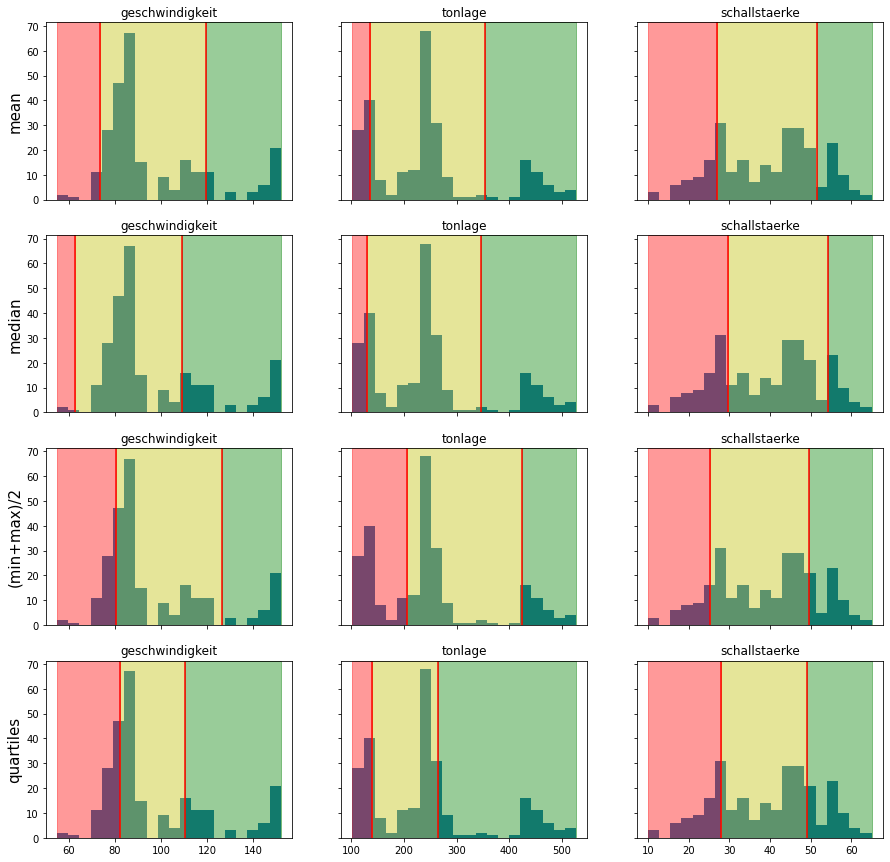

In [39]:

def mean_lower(col):
    return col.mean() - col.std() 

def mean_upper(col):
    return col.mean() + col.std() 

def median_lower(col):
    return col.median() - col.std()

def median_upper(col):
    return col.median() + col.std()

def half_min_max_lower(col):
    return (col.max() + col.min()) / 2 - col.std()

def half_min_max_upper(col):
    return (col.max() + col.min()) / 2 + col.std()

def quartile_lower(col):
    return col.quantile(0.25)

def quartile_upper(col):
    return col.quantile(0.75)


lower_funs = (mean_lower, median_lower, half_min_max_lower, quartile_lower) 
upper_funs = (mean_upper, median_upper, half_min_max_upper, quartile_upper)
fun_names = ("mean", "median", "(min+max)/2", "quartiles")
    
fig, axes = plt.subplots(nrows=len(lower_funs), ncols=3, figsize=(15,15),
                        sharex='col', sharey='row')

for lower_fun, upper_fun, name, row_axes in zip(lower_funs, upper_funs, fun_names, axes):
    
    for col_name, ax in zip(df, row_axes):
        col = df[col_name]

        col.plot.hist(bins=20, ax=ax)
        
        ax.axvline(lower_fun(col), color='r')
        ax.axvline(upper_fun(col), color='r')
        
        ax.axvspan(col.min(), lower_fun(col), alpha=0.4, color='r')
        ax.axvspan(lower_fun(col), upper_fun(col), alpha=0.4, color='y')
        ax.axvspan(upper_fun(col), col.max(), alpha=0.4, color='g')
        ax.set_title(col_name)
        
    row_axes[0].set_ylabel(name, size=15)

In [4]:
for col in df:
    middle = (df[col].min() + df[col].max()) / 2
    print(col, middle - df[col].std(), middle + df[col].std())

geschwindigkeit 80.41449260821402 126.58550739178598
tonlage 205.53426592401945 423.46573407598055
schallstaerke 25.29200256052748 49.70799743947252


In [5]:
from preparation import discretize
discrete_df = discretize(df.copy())

Text(22.200000000000017, 0.5, 'quartiles')

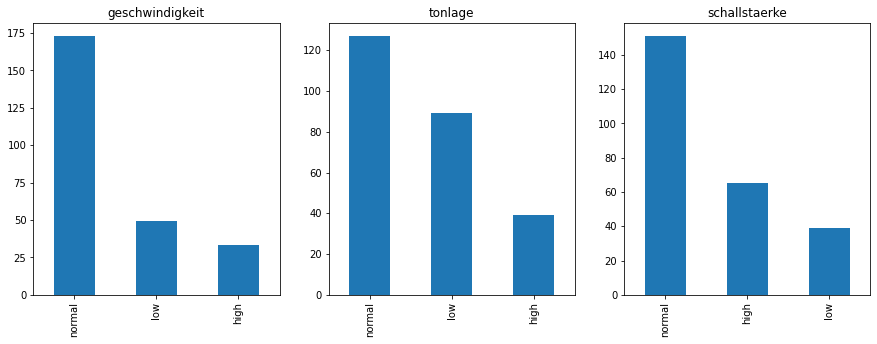

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for col_name, ax in zip(df, axes):
    col = discrete_df[col_name]

    col.value_counts().plot(kind='bar', ax=ax)

    ax.set_title(col_name)

row_axes[0].set_ylabel(name, size=15)

## Schallstärke: geringe Schwankungen

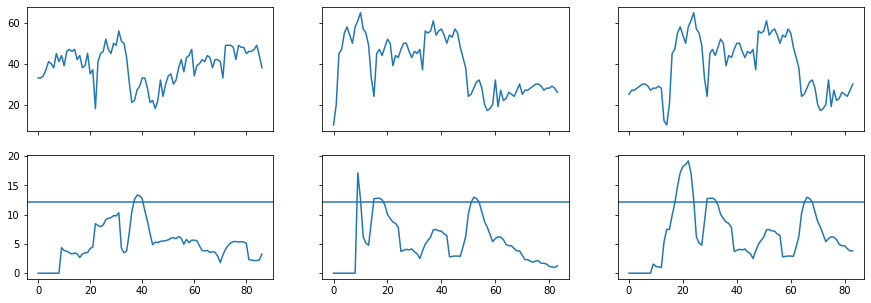

In [43]:
dfs = (df1, df2, df3)
vals = tuple(map(lambda df: df['schallstaerke'], dfs))
windows = tuple(map(lambda df: df.rolling(window=10)['schallstaerke'],
                   dfs))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5),
                         sharey='row', sharex='col')
val_axes, window_axes = axes
                         
for val, ax in zip(vals, val_axes):
    val.plot(ax=ax)

for window, ax in zip(windows, window_axes):
    window.std().fillna(0).plot(ax=ax)
    ax.axhline(df['schallstaerke'].std())

Criterion: Std in last 10 Seconds higher than global std

In [44]:
df['schallstaerke'].std()

12.207997439472523